# **INTRO**

1. [Daten](#1)
2. [Modelle](#2):
   - [Logistic Regression](#3)
   - [Naive Bayes](#4)
   - [Support Vector Machine (SVM)](#5)
   - [KNN - K NEAREST NEIGHBOUR](#6)
   - [Decision Tree](#7)
   - [Random Forest](#8)
3. [Vergleich](#9)


# Beschreibung des Datensatzes

Der Datensatz enthält **7 Merkmale (Features)** und **eine Zielspalte (Label)**.
Er basiert auf synthetischen Gesundheits- und Lifestyle-Daten und eignet sich für Klassifikationsaufgaben.

---

## Merkmale (Features)

- **bmi** – Körpergewicht im Verhältnis zur Körpergröße (Body-Mass-Index)
- **daily_steps** – Durchschnittliche Anzahl an Schritten pro Tag, zeigt das Aktivitätsniveau
- **sleep_hours** – Durchschnittliche Schlafdauer pro Nacht, steht für den Erholungsfaktor
- **calories_consumed** – Durchschnittliche Kalorienaufnahme pro Tag, zeigt den Ernährungszustand
- **cholesterol** – Cholesterinwert, wichtiger Indikator für das Herz-Kreislauf-System
- **systolic_bp** / **diastolic_bp** – Blutdruckwerte (systolisch und diastolisch), geben Auskunft über den Gefäßdruck
- **family_history** – Gibt an, ob in der Familie gesundheitliche Vorbelastungen bestehen (0 = nein, 1 = ja)

---

## Zielspalte (Label)

- **disease_risk** – Klassifizierungslabel:
  - `0` = gesund
  - `1` = erhöhtes Krankheitsrisiko


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



<a id = "1"></a><br>

# **Daten**

In [31]:
# === Daten laden ===
df = pd.read_csv("health_lifestyle_dataset.csv")
df.head()


,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   age                100000 non-null  int64  
 2   gender             100000 non-null  object 
 3   bmi                100000 non-null  float64
 4   daily_steps        100000 non-null  int64  
 5   sleep_hours        100000 non-null  float64
 6   water_intake_l     100000 non-null  float64
 7   calories_consumed  100000 non-null  int64  
 8   smoker             100000 non-null  int64  
 9   alcohol            100000 non-null  int64  
 10  resting_hr         100000 non-null  int64  
 11  systolic_bp        100000 non-null  int64  
 12  diastolic_bp       100000 non-null  int64  
 13  cholesterol        100000 non-null  int64  
 14  family_history     100000 non-null  int64  
 15  disease_risk       100000 non-null  int64  
dtypes: 

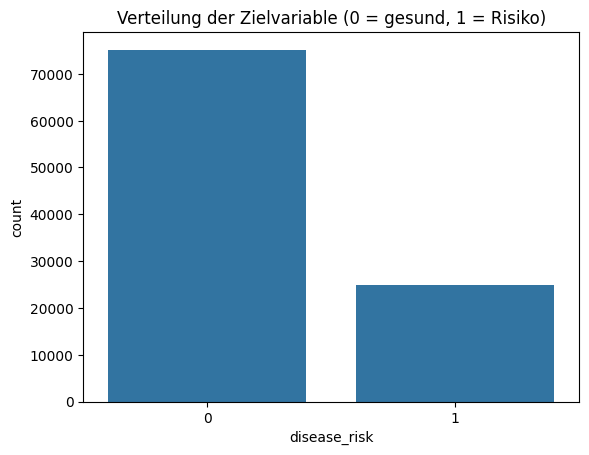

In [33]:
# === Verteilung der Zielvariable ===
sns.countplot(x='disease_risk', data=df)
plt.title("Verteilung der Zielvariable (0 = gesund, 1 = Risiko)")
plt.show()


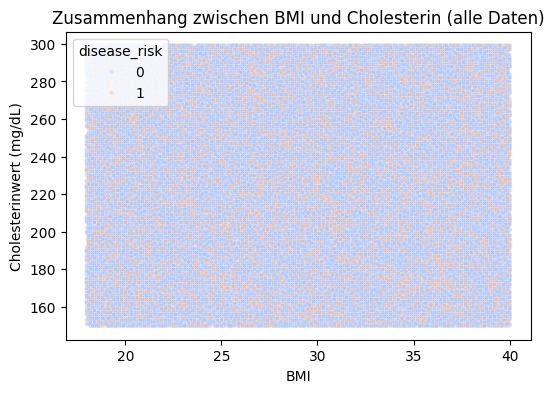

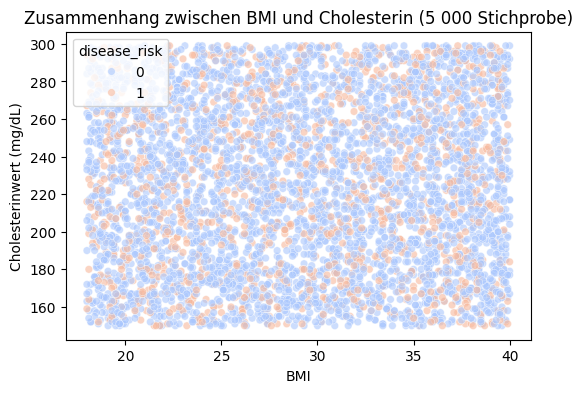

In [34]:
# === Beispiel-Visualisierung: BMI vs. Cholesterin (alle Daten) ===
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='bmi',
    y='cholesterol',
    hue='disease_risk',
    data=df,
    palette='coolwarm',
    alpha=0.4,
    s=10
)
plt.title("Zusammenhang zwischen BMI und Cholesterin (alle Daten)")
plt.xlabel("BMI")
plt.ylabel("Cholesterinwert (mg/dL)")
plt.show()

# === Beispiel-Visualisierung: BMI vs. Cholesterin (5 000er Stichprobe) ===
sample = df.sample(5000)

plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='bmi',
    y='cholesterol',
    hue='disease_risk',
    data=sample,
    palette='coolwarm',
    alpha=0.6,
    s=30
)
plt.title("Zusammenhang zwischen BMI und Cholesterin (5 000 Stichprobe)")
plt.xlabel("BMI")
plt.ylabel("Cholesterinwert (mg/dL)")
plt.show()


In [35]:
# === Features (X) und Zielvariable (y) ===
X = df[[
    "bmi",
    "daily_steps",
    "sleep_hours",
    "calories_consumed",
    "cholesterol",
    "systolic_bp", "diastolic_bp",
    "family_history"
]]
y = df["disease_risk"]

print("X-Shape:", X.shape)
print("y-Shape:", y.shape)


X-Shape: (100000, 8)
y-Shape: (100000,)


<a id = "2"></a><br>

# **Modelle**

<a id = "3"></a><br>
## **Logistic Regression Classifaction**

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# === Daten splitten (30 % Test) ===
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === Modell trainieren ===
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(x_train, y_train)

# === Accuracy ausgeben ===
print("Logistic Regression – Test Accuracy:", logistic_regression.score(x_test, y_test))

Logistic Regression – Test Accuracy: 0.7518


Testanteil 10% – Accuracy: 0.7518
Testanteil 30% – Accuracy: 0.7518
Testanteil 50% – Accuracy: 0.7518
Testanteil 70% – Accuracy: 0.7518
Testanteil 90% – Accuracy: 0.7518


,Testanteil,Trainanteil,Accuracy
0,10%,90%,0.752
1,30%,70%,0.752
2,50%,50%,0.752
3,70%,30%,0.752
4,90%,10%,0.752


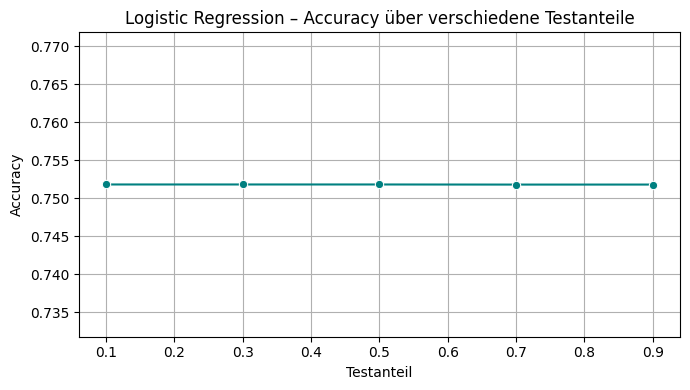

Gespeichert: logreg_accuracy_by_split.csv


In [37]:
# === Logistic Regression – Vergleich über verschiedene Testanteile ===
test_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
rows = []

for t in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=t, random_state=42, stratify=y
    )
    lr = LogisticRegression(max_iter=1000, random_state=42)
    lr.fit(x_train, y_train)
    acc = lr.score(x_test, y_test)
    rows.append({"Testanteil": t, "Trainanteil": 1 - t, "Accuracy": acc})
    print(f"Testanteil {int(t*100)}% – Accuracy: {acc:.4f}")

# === Tabelle & Plot ===
lr_acc = pd.DataFrame(rows)
display(lr_acc.style.format({"Testanteil": "{:.0%}", "Trainanteil": "{:.0%}", "Accuracy": "{:.3f}"}))

plt.figure(figsize=(7, 4))
sns.lineplot(data=lr_acc, x="Testanteil", y="Accuracy", marker="o", color="teal")
plt.title("Logistic Regression – Accuracy über verschiedene Testanteile")
plt.xlabel("Testanteil")
plt.ylabel("Accuracy")
plt.ylim(lr_acc["Accuracy"].min() - 0.02, lr_acc["Accuracy"].max() + 0.02)
plt.grid(True)
plt.tight_layout()
plt.show()

lr_acc.to_csv("logreg_accuracy_by_split.csv", index=False)
print("Gespeichert: logreg_accuracy_by_split.csv")



=== Testanteil: 10% ===
Accuracy: 0.7518
Classification Report:
               precision    recall  f1-score   support

           0      0.752     1.000     0.858      7518
           1      0.000     0.000     0.000      2482

    accuracy                          0.752     10000
   macro avg      0.376     0.500     0.429     10000
weighted avg      0.565     0.752     0.645     10000



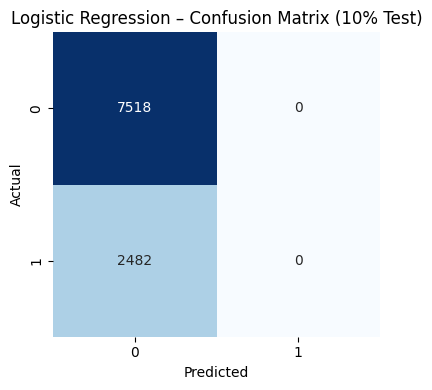


=== Testanteil: 30% ===
Accuracy: 0.7518
Classification Report:
               precision    recall  f1-score   support

           0      0.752     1.000     0.858     22554
           1      0.000     0.000     0.000      7446

    accuracy                          0.752     30000
   macro avg      0.376     0.500     0.429     30000
weighted avg      0.565     0.752     0.645     30000



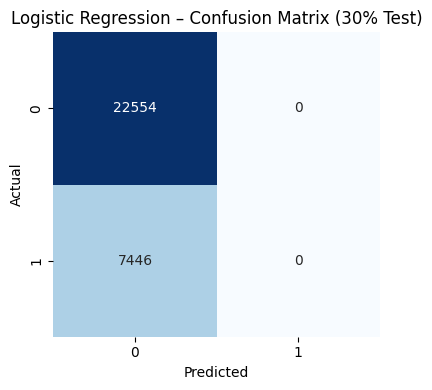


=== Testanteil: 50% ===
Accuracy: 0.7518
Classification Report:
               precision    recall  f1-score   support

           0      0.752     1.000     0.858     37590
           1      0.000     0.000     0.000     12410

    accuracy                          0.752     50000
   macro avg      0.376     0.500     0.429     50000
weighted avg      0.565     0.752     0.645     50000



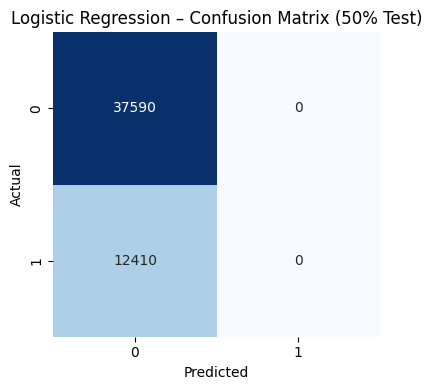


=== Testanteil: 70% ===
Accuracy: 0.7518
Classification Report:
               precision    recall  f1-score   support

           0      0.752     1.000     0.858     52625
           1      0.000     0.000     0.000     17375

    accuracy                          0.752     70000
   macro avg      0.376     0.500     0.429     70000
weighted avg      0.565     0.752     0.645     70000



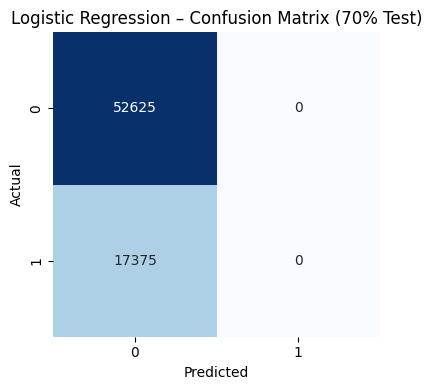


=== Testanteil: 90% ===
Accuracy: 0.7518
Classification Report:
               precision    recall  f1-score   support

           0      0.752     1.000     0.858     67661
           1      0.000     0.000     0.000     22339

    accuracy                          0.752     90000
   macro avg      0.376     0.500     0.429     90000
weighted avg      0.565     0.752     0.645     90000



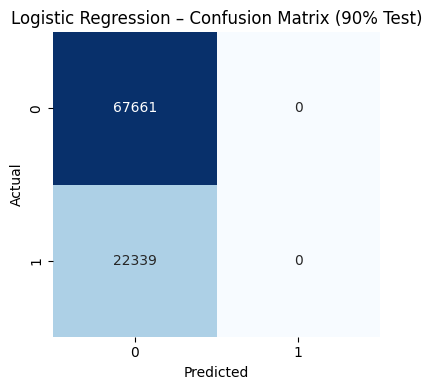

In [38]:
# === Logistic Regression – Confusion Matrix & Report für verschiedene Testanteile ===
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

test_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]

for split_p in test_sizes:
    print(f"\n=== Testanteil: {int(split_p * 100)}% ===")

    # Daten splitten
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=split_p, random_state=42, stratify=y
    )

    # Modell trainieren
    lr = LogisticRegression(max_iter=1000, random_state=42)
    lr.fit(x_train, y_train)

    # Vorhersage
    y_pred = lr.predict(x_test)
    acc = lr.score(x_test, y_test)

    # Ergebnisse ausgeben
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))

    # Confusion Matrix visualisieren
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Logistic Regression – Confusion Matrix ({int(split_p * 100)}% Test)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


,Testanteil,Trainanteil,Accuracy
0,10%,90%,0.752
1,30%,70%,0.752
2,50%,50%,0.752
3,70%,30%,0.752
4,90%,10%,0.752


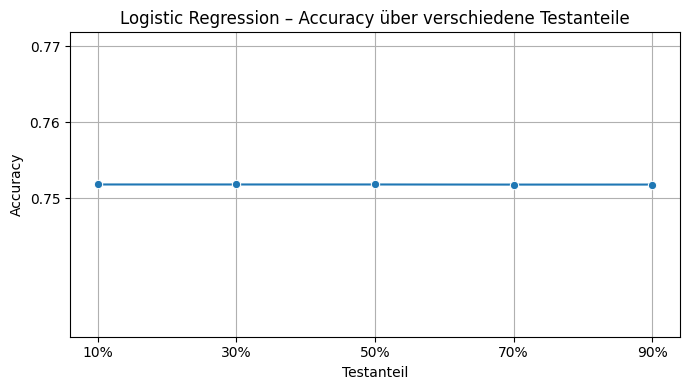

Gespeichert: lr_accuracy_by_split.csv


In [39]:
# === Logistic Regression – Übersichtstabelle & Plot (Accuracy je Testanteil) ===
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

test_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
rows = []

for t in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=t, random_state=42, stratify=y
    )
    lr = LogisticRegression(max_iter=1000, random_state=42).fit(x_train, y_train)
    acc = lr.score(x_test, y_test)
    rows.append({"Testanteil": t, "Trainanteil": 1 - t, "Accuracy": acc})

lr_acc = pd.DataFrame(rows)
display(lr_acc.style.format({"Testanteil": "{:.0%}", "Trainanteil": "{:.0%}", "Accuracy": "{:.3f}"}))

plt.figure(figsize=(7, 4))
sns.lineplot(data=lr_acc, x="Testanteil", y="Accuracy", marker="o")
plt.xticks(test_sizes, [f"{int(t*100)}%" for t in test_sizes])
plt.ylim(lr_acc["Accuracy"].min() - 0.02, lr_acc["Accuracy"].max() + 0.02)
plt.yticks(np.arange(round(lr_acc["Accuracy"].min(), 2),
                     round(lr_acc["Accuracy"].max() + 0.02, 2), 0.01))
plt.ticklabel_format(style="plain", axis="y")
plt.title("Logistic Regression – Accuracy über verschiedene Testanteile")
plt.xlabel("Testanteil")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: für Bericht speichern
lr_acc.to_csv("lr_accuracy_by_split.csv", index=False)
print("Gespeichert: lr_accuracy_by_split.csv")


<a id = "3"></a><br>

## **Naive Bayes Classifaction**


In [40]:
# === Naive Bayes: Einzellauf (30 % Test) ===
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

print("Test accuracy: ", naive_bayes.score(x_test, y_test))

Test accuracy:  0.7518


Testanteil 10% - Accuracy: 0.7518
Testanteil 30% - Accuracy: 0.7518
Testanteil 50% - Accuracy: 0.7518
Testanteil 70% - Accuracy: 0.7518
Testanteil 90% - Accuracy: 0.7518


,Testanteil,Trainanteil,Accuracy
0,0.1,0.9,0.751800
1,0.3,0.7,0.751800
2,0.5,0.5,0.751800
3,0.7,0.3,0.751786
4,0.9,0.1,0.751789


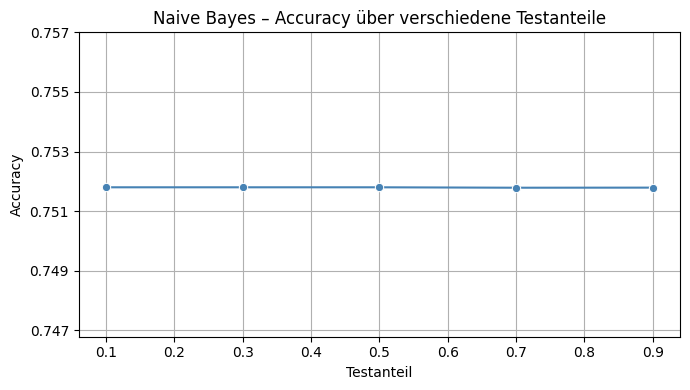

In [41]:
# === Naive Bayes: 10/30/50/70/90 % Testanteil ===
test_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
nb_rows = []

for t in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=t, random_state=42, stratify=y
    )
    naive_bayes = GaussianNB().fit(x_train, y_train)
    acc = naive_bayes.score(x_test, y_test)
    nb_rows.append({"Testanteil": t, "Trainanteil": 1 - t, "Accuracy": acc})
    print(f"Testanteil {int(t*100)}% - Accuracy: {acc:.4f}")

import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
nb_df = pd.DataFrame(nb_rows)
display(nb_df)

plt.figure(figsize=(7, 4))
sns.lineplot(data=nb_df, x="Testanteil", y="Accuracy", marker="o", color="steelblue")

ax = plt.gca()
# Y-Achse normal darstellen (keine 1e-5 Schreibweise)
ax.ticklabel_format(style="plain", axis="y")
ax.yaxis.set_major_formatter(plt.FormatStrFormatter("%.3f"))

# Achsen-Layout vereinheitlichen
plt.ylim(nb_df["Accuracy"].min() - 0.005, nb_df["Accuracy"].max() + 0.005)
plt.yticks(np.arange(round(nb_df["Accuracy"].min(), 3) - 0.005,
                     round(nb_df["Accuracy"].max(), 3) + 0.005, 0.002))

plt.title("Naive Bayes – Accuracy über verschiedene Testanteile")
plt.xlabel("Testanteil")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()





=== Testanteil: 10% ===
Accuracy: 0.7518
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      7518
           1       0.00      0.00      0.00      2482

    accuracy                           0.75     10000
   macro avg       0.38      0.50      0.43     10000
weighted avg       0.57      0.75      0.65     10000



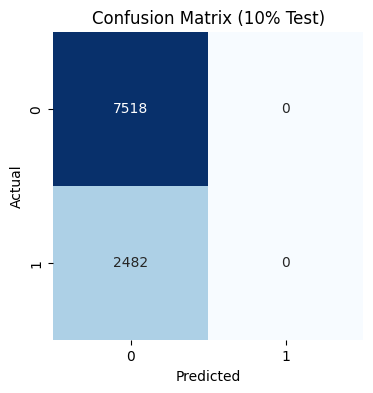


=== Testanteil: 30% ===
Accuracy: 0.7518
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     22554
           1       0.00      0.00      0.00      7446

    accuracy                           0.75     30000
   macro avg       0.38      0.50      0.43     30000
weighted avg       0.57      0.75      0.65     30000



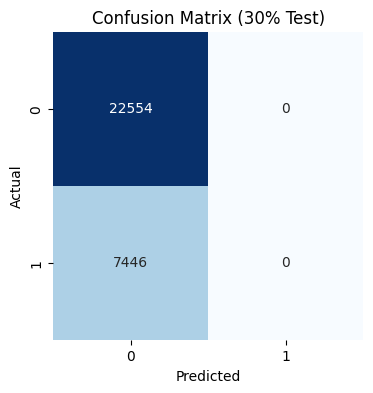


=== Testanteil: 50% ===
Accuracy: 0.7518
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     37590
           1       0.00      0.00      0.00     12410

    accuracy                           0.75     50000
   macro avg       0.38      0.50      0.43     50000
weighted avg       0.57      0.75      0.65     50000



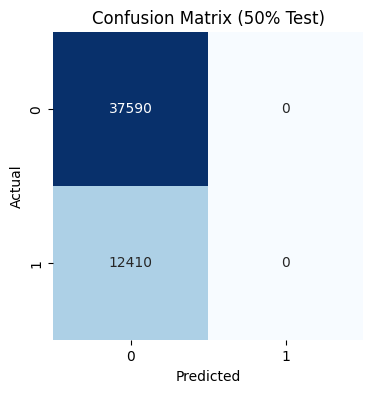


=== Testanteil: 70% ===
Accuracy: 0.7518
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     52625
           1       0.00      0.00      0.00     17375

    accuracy                           0.75     70000
   macro avg       0.38      0.50      0.43     70000
weighted avg       0.57      0.75      0.65     70000



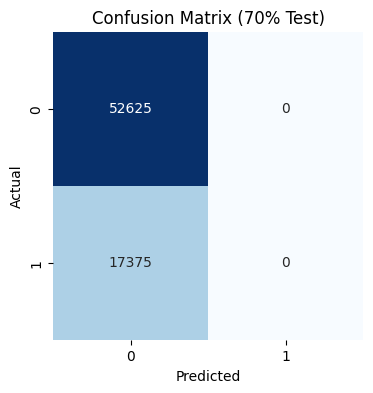


=== Testanteil: 90% ===
Accuracy: 0.7518
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     67661
           1       0.00      0.00      0.00     22339

    accuracy                           0.75     90000
   macro avg       0.38      0.50      0.43     90000
weighted avg       0.57      0.75      0.65     90000



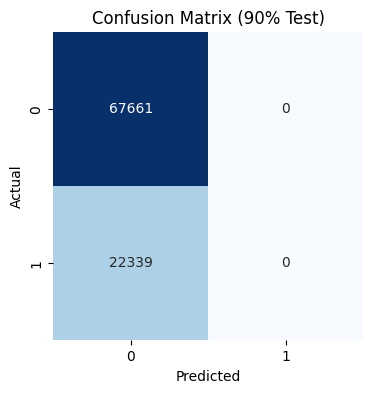

In [42]:
# === Naive Bayes – Alle Splits (10, 30, 50, 70, 90 %) ===
from sklearn.metrics import confusion_matrix, classification_report

test_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]

for split_p in test_sizes:
    print(f"\n=== Testanteil: {int(split_p * 100)}% ===")

    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=split_p, random_state=42, stratify=y
    )

    naive_bayes = GaussianNB().fit(x_train, y_train)
    y_pred = naive_bayes.predict(x_test)

    acc = naive_bayes.score(x_test, y_test)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix ({int(split_p * 100)}% Test)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


,Testanteil,Trainanteil,Accuracy
0,10%,90%,0.752
1,30%,70%,0.752
2,50%,50%,0.752
3,70%,30%,0.752
4,90%,10%,0.752


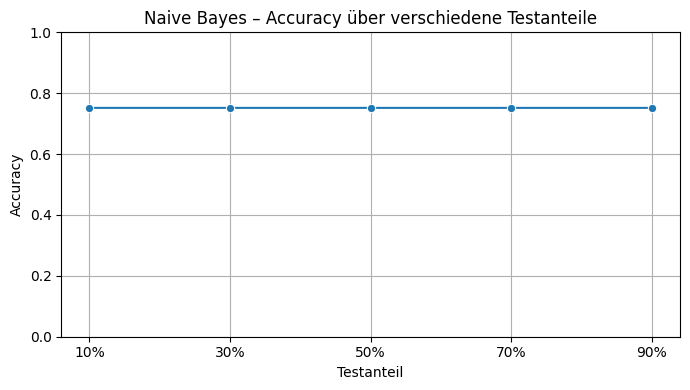

Gespeichert: nb_accuracy_by_split.csv


In [43]:
# === Naive Bayes – Übersichtstabelle & Plot (Accuracy je Testanteil) ===
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd

test_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
rows = []

for t in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=t, random_state=42, stratify=y
    )
    nb = GaussianNB().fit(x_train, y_train)
    acc = nb.score(x_test, y_test)
    rows.append({"Testanteil": t, "Trainanteil": 1 - t, "Accuracy": acc})

nb_acc = pd.DataFrame(rows)
display(nb_acc.style.format({"Testanteil": "{:.0%}", "Trainanteil": "{:.0%}", "Accuracy": "{:.3f}"}))

# Plot
plt.figure(figsize=(7, 4))
sns.lineplot(data=nb_acc, x="Testanteil", y="Accuracy", marker="o")
plt.xticks(test_sizes, [f"{int(t*100)}%" for t in test_sizes])
plt.ylim(0, 1)
plt.title("Naive Bayes – Accuracy über verschiedene Testanteile")

plt.xlabel("Testanteil")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

nb_acc.to_csv("nb_accuracy_by_split.csv", index=False)
print("Gespeichert: nb_accuracy_by_split.csv")


<a id = "4"></a><br>

## **Support Vector Machine (SVM) Classifaction**



In [44]:
# === SVM: Einzellauf (30 % Test) ===
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

svm = SVC()  # Template-nah (ohne Pipeline)
svm.fit(x_train, y_train)

print("SVM Test accuracy:", svm.score(x_test, y_test))

SVM Test accuracy: 0.7518


Testanteil 10% – Accuracy: 0.7518
Testanteil 30% – Accuracy: 0.7518
Testanteil 50% – Accuracy: 0.7518
Testanteil 70% – Accuracy: 0.7518
Testanteil 90% – Accuracy: 0.7518


,Testanteil,Trainanteil,Accuracy
0,0.1,0.9,0.751800
1,0.3,0.7,0.751800
2,0.5,0.5,0.751800
3,0.7,0.3,0.751786
4,0.9,0.1,0.751789


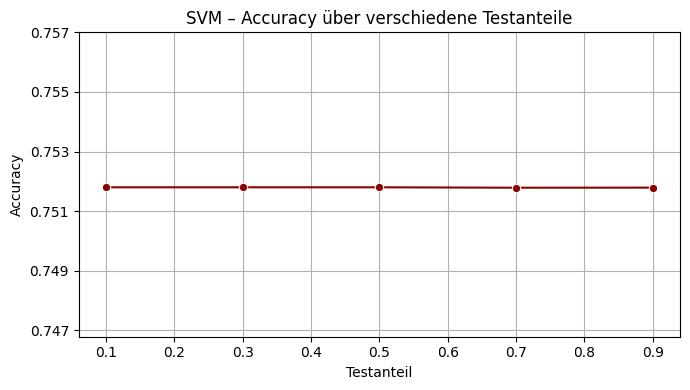

In [45]:
# === SVM: 10/30/50/70/90 % Testanteil ===
test_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
svm_rows = []

for t in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=t, random_state=42, stratify=y
    )
    svm = SVC().fit(x_train, y_train)
    acc = svm.score(x_test, y_test)
    svm_rows.append({"Testanteil": t, "Trainanteil": 1 - t, "Accuracy": acc})
    print(f"Testanteil {int(t*100)}% – Accuracy: {acc:.4f}")

svm_df = pd.DataFrame(svm_rows)
display(svm_df)

plt.figure(figsize=(7, 4))
sns.lineplot(data=svm_df, x="Testanteil", y="Accuracy", marker="o", color="darkred")

ax = plt.gca()
ax.ticklabel_format(style="plain", axis="y")
ax.yaxis.set_major_formatter(plt.FormatStrFormatter("%.3f"))

plt.ylim(svm_df["Accuracy"].min() - 0.005, svm_df["Accuracy"].max() + 0.005)
plt.yticks(np.arange(round(svm_df["Accuracy"].min(), 3) - 0.005,
                     round(svm_df["Accuracy"].max(), 3) + 0.005, 0.002))

plt.title("SVM – Accuracy über verschiedene Testanteile")
plt.xlabel("Testanteil")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()



=== Testanteil: 10% ===
Accuracy: 0.7518
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      7518
           1       0.00      0.00      0.00      2482

    accuracy                           0.75     10000
   macro avg       0.38      0.50      0.43     10000
weighted avg       0.57      0.75      0.65     10000



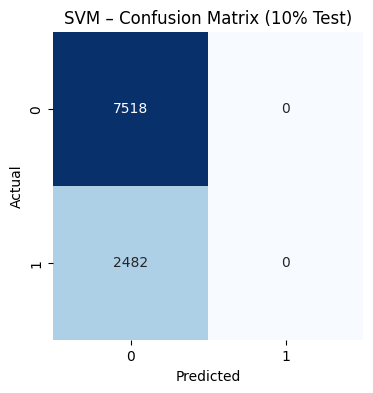


=== Testanteil: 30% ===
Accuracy: 0.7518
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     22554
           1       0.00      0.00      0.00      7446

    accuracy                           0.75     30000
   macro avg       0.38      0.50      0.43     30000
weighted avg       0.57      0.75      0.65     30000



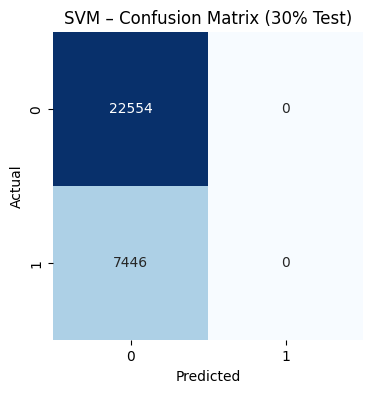


=== Testanteil: 50% ===
Accuracy: 0.7518
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     37590
           1       0.00      0.00      0.00     12410

    accuracy                           0.75     50000
   macro avg       0.38      0.50      0.43     50000
weighted avg       0.57      0.75      0.65     50000



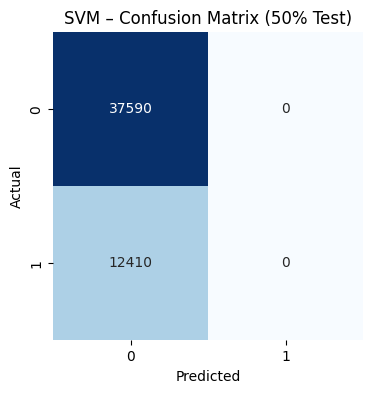


=== Testanteil: 70% ===
Accuracy: 0.7518
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     52625
           1       0.00      0.00      0.00     17375

    accuracy                           0.75     70000
   macro avg       0.38      0.50      0.43     70000
weighted avg       0.57      0.75      0.65     70000



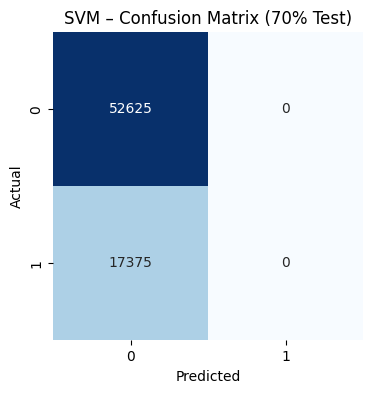


=== Testanteil: 90% ===
Accuracy: 0.7518
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     67661
           1       0.00      0.00      0.00     22339

    accuracy                           0.75     90000
   macro avg       0.38      0.50      0.43     90000
weighted avg       0.57      0.75      0.65     90000



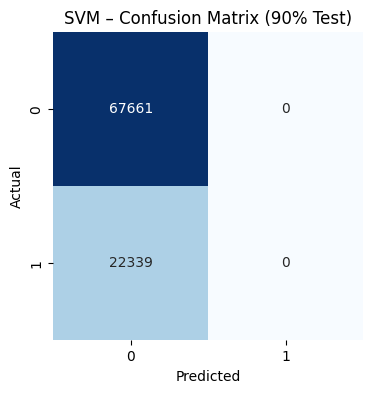

In [46]:
# === SVM: Confusion Matrices für alle Testanteile ===
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

test_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]

for split_p in test_sizes:
    print(f"\n=== Testanteil: {int(split_p * 100)}% ===")

    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=split_p, random_state=42, stratify=y
    )

    svm = SVC().fit(x_train, y_train)
    y_pred = svm.predict(x_test)

    acc = svm.score(x_test, y_test)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"SVM – Confusion Matrix ({int(split_p * 100)}% Test)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


,Testanteil,Trainanteil,Accuracy
0,10%,90%,0.752
1,30%,70%,0.752
2,50%,50%,0.752
3,70%,30%,0.752
4,90%,10%,0.752


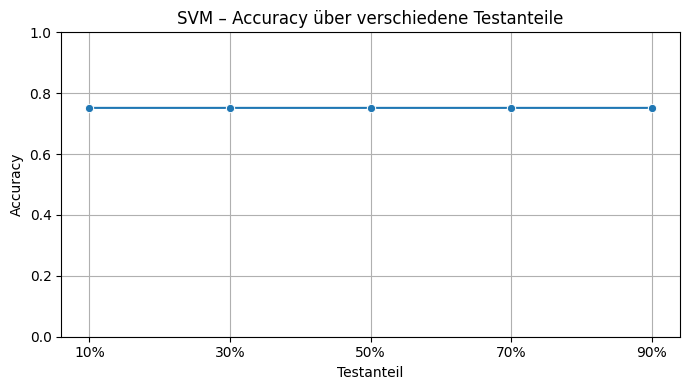

Gespeichert: svm_accuracy_by_split.csv


In [47]:
# === SVM – Übersichtstabelle & Plot (Accuracy je Testanteil) ===
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd

test_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
rows = []

for t in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=t, random_state=42, stratify=y
    )
    svm = SVC().fit(x_train, y_train)
    acc = svm.score(x_test, y_test)
    rows.append({"Testanteil": t, "Trainanteil": 1 - t, "Accuracy": acc})

svm_acc = pd.DataFrame(rows)
display(svm_acc.style.format({"Testanteil": "{:.0%}", "Trainanteil": "{:.0%}", "Accuracy": "{:.3f}"}))

plt.figure(figsize=(7, 4))
sns.lineplot(data=svm_acc, x="Testanteil", y="Accuracy", marker="o")
plt.xticks(test_sizes, [f"{int(t*100)}%" for t in test_sizes])
plt.ylim(0, 1)
plt.title("SVM – Accuracy über verschiedene Testanteile")
plt.xlabel("Testanteil")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

svm_acc.to_csv("svm_accuracy_by_split.csv", index=False)
print("Gespeichert: svm_accuracy_by_split.csv")


<a id = "5"></a><br>

## **KNN - K NEAREST NEIGHBOUR**



In [48]:
# === KNN: Einzellauf (30 % Test) ===
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

knn = KNeighborsClassifier(n_neighbors=5)  # Standardwert, wie im Template
knn.fit(x_train, y_train)

print("KNN Test accuracy:", knn.score(x_test, y_test))


KNN Test accuracy: 0.6992666666666667


Testanteil 10% – Accuracy: 0.7002
Testanteil 30% – Accuracy: 0.6993
Testanteil 50% – Accuracy: 0.6998
Testanteil 70% – Accuracy: 0.6998
Testanteil 90% – Accuracy: 0.7023


,Testanteil,Trainanteil,Accuracy
0,10%,90%,0.700
1,30%,70%,0.699
2,50%,50%,0.700
3,70%,30%,0.700
4,90%,10%,0.702


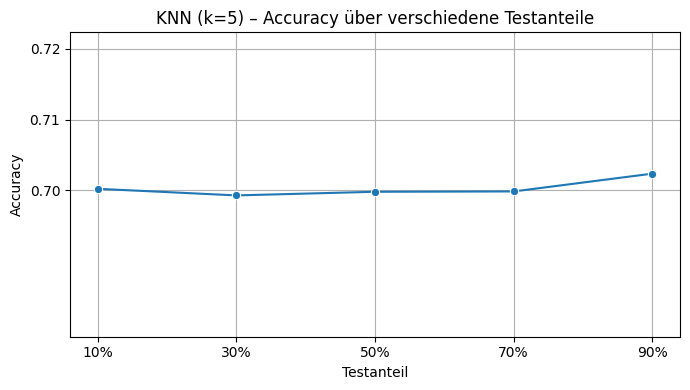

Gespeichert: knn_accuracy_by_split.csv


In [49]:
# === KNN: 10/30/50/70/90 % Testanteil (k=5) – Tabelle + Plot ===
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

test_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
rows = []

for t in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=t, random_state=42, stratify=y
    )
    knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
    acc = knn.score(x_test, y_test)
    rows.append({"Testanteil": t, "Trainanteil": 1 - t, "Accuracy": acc})
    print(f"Testanteil {int(t*100)}% – Accuracy: {acc:.4f}")

knn_acc = pd.DataFrame(rows)
display(knn_acc.style.format({"Testanteil": "{:.0%}", "Trainanteil": "{:.0%}", "Accuracy": "{:.3f}"}))

plt.figure(figsize=(7, 4))
sns.lineplot(data=knn_acc, x="Testanteil", y="Accuracy", marker="o")
plt.xticks(test_sizes, [f"{int(t*100)}%" for t in test_sizes])
plt.ylim(0, 1)
plt.title("KNN (k=5) – Accuracy über verschiedene Testanteile")
plt.ylim(knn_acc["Accuracy"].min() - 0.02, knn_acc["Accuracy"].max() + 0.02)
plt.yticks(np.arange(round(knn_acc["Accuracy"].min(), 2),
                     round(knn_acc["Accuracy"].max() + 0.02, 2), 0.01))

plt.xlabel("Testanteil")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

knn_acc.to_csv("knn_accuracy_by_split.csv", index=False)
print("Gespeichert: knn_accuracy_by_split.csv")



=== Testanteil: 10% ===
Accuracy: 0.7002
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82      7518
           1       0.24      0.10      0.14      2482

    accuracy                           0.70     10000
   macro avg       0.50      0.50      0.48     10000
weighted avg       0.63      0.70      0.65     10000



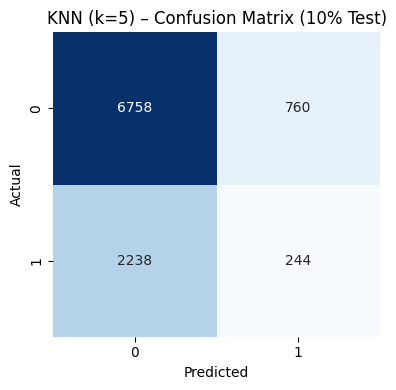


=== Testanteil: 30% ===
Accuracy: 0.6993
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82     22554
           1       0.25      0.10      0.14      7446

    accuracy                           0.70     30000
   macro avg       0.50      0.50      0.48     30000
weighted avg       0.63      0.70      0.65     30000



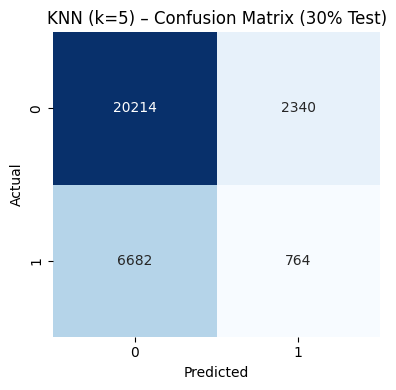


=== Testanteil: 50% ===
Accuracy: 0.6998
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82     37590
           1       0.24      0.10      0.14     12410

    accuracy                           0.70     50000
   macro avg       0.50      0.50      0.48     50000
weighted avg       0.63      0.70      0.65     50000



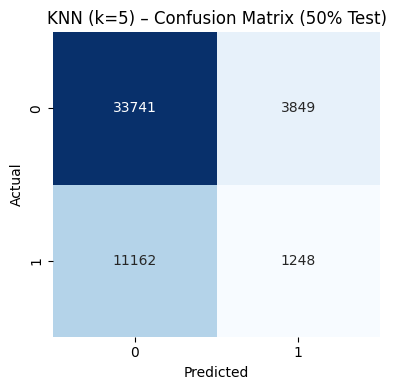


=== Testanteil: 70% ===
Accuracy: 0.6998
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82     52625
           1       0.25      0.10      0.15     17375

    accuracy                           0.70     70000
   macro avg       0.50      0.50      0.48     70000
weighted avg       0.63      0.70      0.65     70000



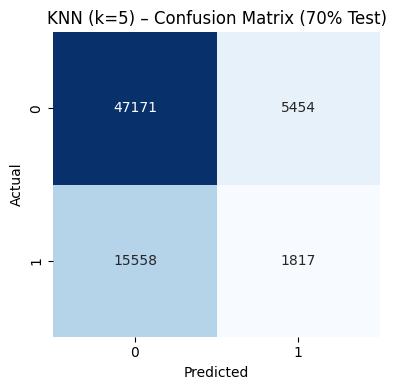


=== Testanteil: 90% ===
Accuracy: 0.7023
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82     67661
           1       0.25      0.10      0.14     22339

    accuracy                           0.70     90000
   macro avg       0.50      0.50      0.48     90000
weighted avg       0.63      0.70      0.65     90000



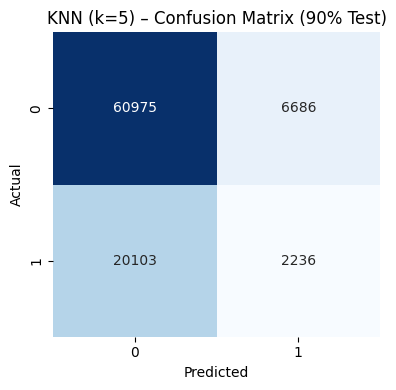

In [50]:
# === KNN: Confusion Matrices für alle Testanteile ===
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

test_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]

for split_p in test_sizes:
    print(f"\n=== Testanteil: {int(split_p * 100)}% ===")

    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=split_p, random_state=42, stratify=y
    )

    # Modelltraining mit k = 5
    knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    # Genauigkeit & Report
    acc = knn.score(x_test, y_test)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix visualisieren
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"KNN (k=5) – Confusion Matrix ({int(split_p * 100)}% Test)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


Testanteil,0.100000,0.300000,0.500000,0.700000,0.900000
k,,,,,
1,0.631,0.628,0.625,0.625,0.628
3,0.672,0.670,0.672,0.675,0.674
5,0.700,0.699,0.700,0.700,0.702
7,0.716,0.715,0.715,0.717,0.717
9,0.728,0.726,0.726,0.730,0.729
11,0.736,0.733,0.733,0.736,0.736
13,0.740,0.739,0.739,0.740,0.741
15,0.742,0.742,0.743,0.744,0.743
17,0.747,0.746,0.745,0.746,0.746


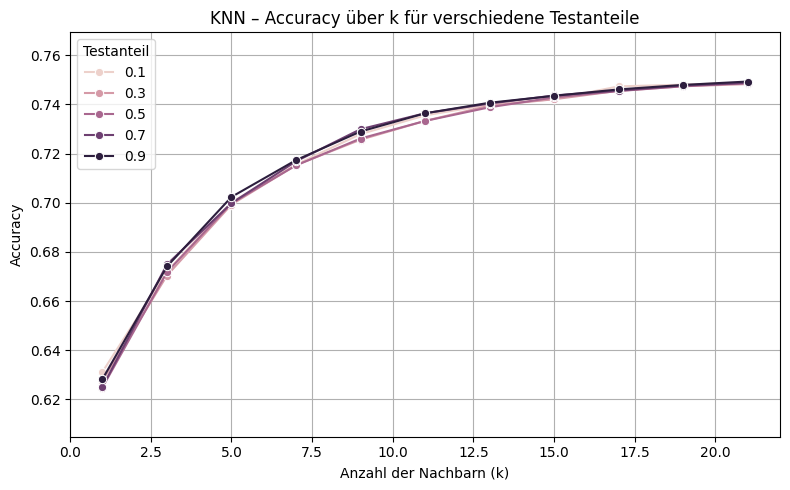

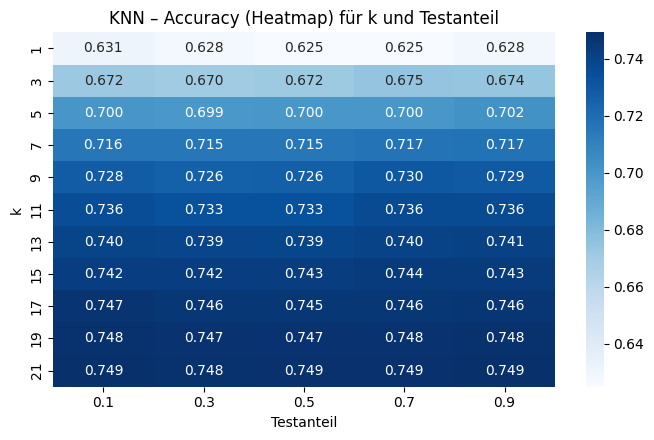


=== Testanteil 10% → bestes k = 21 (Accuracy 0.7488) ===
Classification Report:
               precision    recall  f1-score   support

           0      0.752     0.995     0.856      7518
           1      0.212     0.004     0.009      2482

    accuracy                          0.749     10000
   macro avg      0.482     0.499     0.432     10000
weighted avg      0.618     0.749     0.646     10000



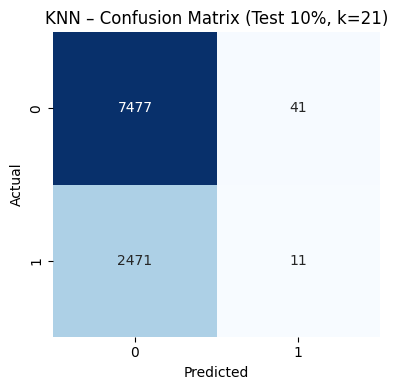


=== Testanteil 30% → bestes k = 21 (Accuracy 0.7482) ===
Classification Report:
               precision    recall  f1-score   support

           0      0.752     0.993     0.856     22554
           1      0.228     0.006     0.012      7446

    accuracy                          0.748     30000
   macro avg      0.490     0.500     0.434     30000
weighted avg      0.622     0.748     0.646     30000



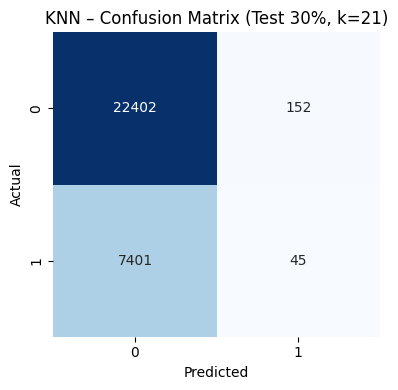


=== Testanteil 50% → bestes k = 21 (Accuracy 0.7487) ===
Classification Report:
               precision    recall  f1-score   support

           0      0.752     0.994     0.856     37590
           1      0.249     0.006     0.012     12410

    accuracy                          0.749     50000
   macro avg      0.501     0.500     0.434     50000
weighted avg      0.627     0.749     0.647     50000



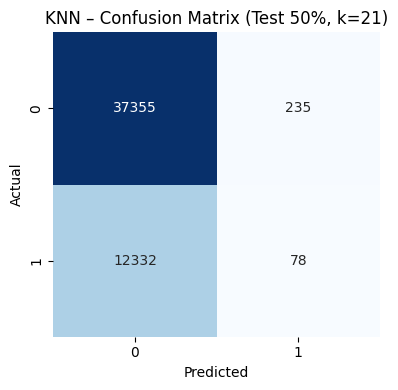


=== Testanteil 70% → bestes k = 21 (Accuracy 0.7487) ===
Classification Report:
               precision    recall  f1-score   support

           0      0.752     0.994     0.856     52625
           1      0.248     0.006     0.012     17375

    accuracy                          0.749     70000
   macro avg      0.500     0.500     0.434     70000
weighted avg      0.627     0.749     0.647     70000



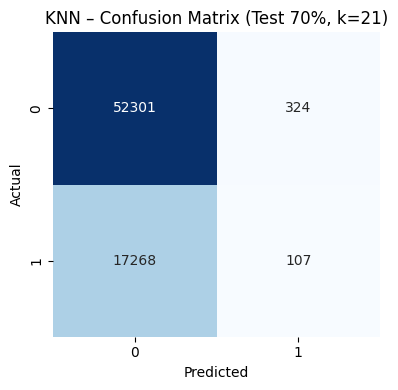


=== Testanteil 90% → bestes k = 21 (Accuracy 0.7493) ===
Classification Report:
               precision    recall  f1-score   support

           0      0.752     0.995     0.856     67661
           1      0.268     0.006     0.011     22339

    accuracy                          0.749     90000
   macro avg      0.510     0.500     0.434     90000
weighted avg      0.632     0.749     0.647     90000



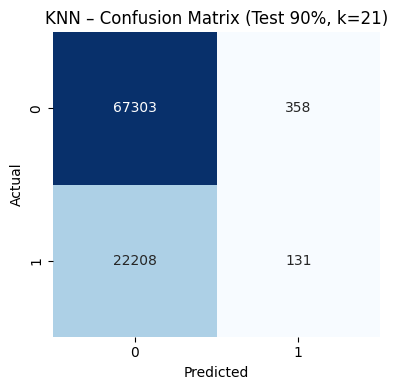

Gespeichert: knn_accuracy_grid_over_k_and_splits.csv


In [51]:
# === KNN: k-Werte bei verschiedenen Testanteilen (10/30/50/70/90 %) ===
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np

test_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
k_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

rows = []

# --- Sweep über Testanteile und k ---
for t in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=t, random_state=42, stratify=y
    )
    for k in k_list:
        knn = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
        acc = knn.score(x_test, y_test)
        rows.append({"Testanteil": t, "k": k, "Accuracy": acc})

# === Tabelle: jede Zeile = k, jede Spalte = Testanteil ===
knn_grid = pd.DataFrame(rows)
knn_pivot = knn_grid.pivot(index="k", columns="Testanteil", values="Accuracy").sort_index()
display(knn_pivot.style.format("{:.3f}"))

# === Linienplot: Accuracy vs. k, farblich je Testanteil ===
plt.figure(figsize=(8, 5))
sns.lineplot(data=knn_grid, x="k", y="Accuracy", hue="Testanteil", marker="o")
plt.title("KNN – Accuracy über k für verschiedene Testanteile")
plt.xlabel("Anzahl der Nachbarn (k)")
plt.ylabel("Accuracy")
plt.ylim(knn_grid["Accuracy"].min() - 0.02, knn_grid["Accuracy"].max() + 0.02)
plt.grid(True)
plt.tight_layout()
plt.show()

# (Optional) Heatmap: k × Testanteil
plt.figure(figsize=(7, 4.5))
sns.heatmap(knn_pivot, annot=True, fmt=".3f", cmap="Blues")
plt.title("KNN – Accuracy (Heatmap) für k und Testanteil")
plt.xlabel("Testanteil"); plt.ylabel("k")
plt.tight_layout()
plt.show()

# === Bestes k je Testanteil bestimmen + Confusion-Matrix ausgeben ===
from sklearn.metrics import classification_report

for t in test_sizes:
    sub = knn_grid[knn_grid["Testanteil"] == t]
    best_row = sub.loc[sub["Accuracy"].idxmax()]
    best_k = int(best_row["k"])
    best_acc = float(best_row["Accuracy"])
    print(f"\n=== Testanteil {int(t*100)}% → bestes k = {best_k} (Accuracy {best_acc:.4f}) ===")

    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=t, random_state=42, stratify=y
    )
    best_knn = KNeighborsClassifier(n_neighbors=best_k).fit(x_train, y_train)
    y_pred = best_knn.predict(x_test)

    print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"KNN – Confusion Matrix (Test {int(t*100)}%, k={best_k})")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

knn_grid.to_csv("knn_accuracy_grid_over_k_and_splits.csv", index=False)
print("Gespeichert: knn_accuracy_grid_over_k_and_splits.csv")


<a id = "6"></a><br>

## **Decision Tree Classifaction**



In [52]:
# === Decision Tree: Einzellauf (30 % Test) ===
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

print("Decision Tree Test accuracy:", dt.score(x_test, y_test))


Decision Tree Test accuracy: 0.6156


Testanteil 10% – Accuracy: 0.6169
Testanteil 30% – Accuracy: 0.6156
Testanteil 50% – Accuracy: 0.6178
Testanteil 70% – Accuracy: 0.6137
Testanteil 90% – Accuracy: 0.6178


,Testanteil,Trainanteil,Accuracy
0,0.1,0.9,0.616900
1,0.3,0.7,0.615600
2,0.5,0.5,0.617820
3,0.7,0.3,0.613700
4,0.9,0.1,0.617756


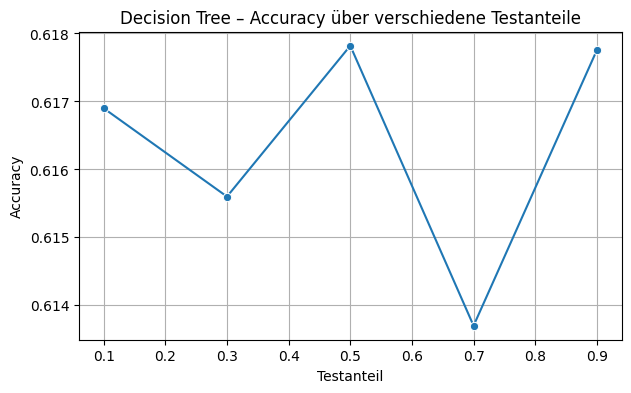

In [53]:
# === Decision Tree: 10/30/50/70/90 % Testanteil (Tabelle + Plot) ===
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

test_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
dt_rows = []

for t in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=t, random_state=42, stratify=y
    )
    dt_tmp = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)
    acc = dt_tmp.score(x_test, y_test)
    dt_rows.append({"Testanteil": t, "Trainanteil": 1 - t, "Accuracy": acc})
    print(f"Testanteil {int(t*100)}% – Accuracy: {acc:.4f}")

# Tabelle + Plot
_dt_df = pd.DataFrame(dt_rows)
display(_dt_df)

plt.figure(figsize=(7, 4))
sns.lineplot(data=_dt_df, x="Testanteil", y="Accuracy", marker="o")
plt.title("Decision Tree – Accuracy über verschiedene Testanteile")
plt.xlabel("Testanteil"); plt.ylabel("Accuracy"); plt.grid(True); plt.show()


=== Testanteil: 10% ===
Accuracy: 0.6169
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      7518
           1       0.25      0.27      0.26      2482

    accuracy                           0.62     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.63      0.62      0.62     10000



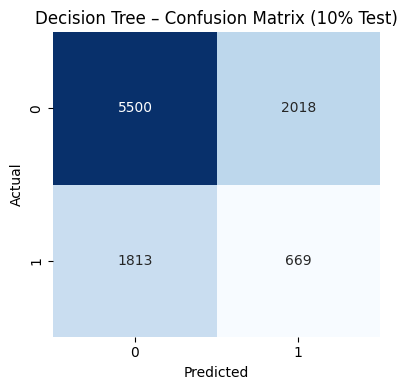


=== Testanteil: 30% ===
Accuracy: 0.6156
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74     22554
           1       0.25      0.27      0.26      7446

    accuracy                           0.62     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.63      0.62      0.62     30000



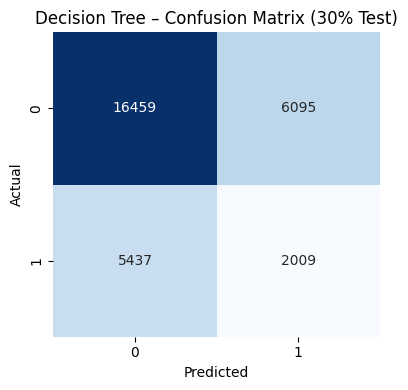


=== Testanteil: 50% ===
Accuracy: 0.6178
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74     37590
           1       0.25      0.28      0.26     12410

    accuracy                           0.62     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.63      0.62      0.62     50000



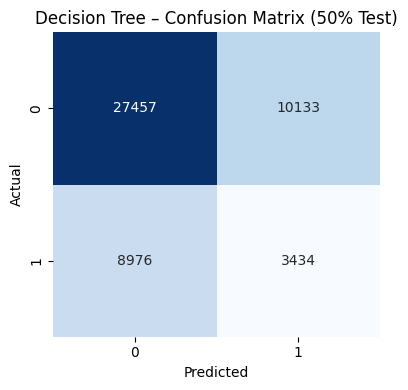


=== Testanteil: 70% ===
Accuracy: 0.6137
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74     52625
           1       0.25      0.27      0.26     17375

    accuracy                           0.61     70000
   macro avg       0.50      0.50      0.50     70000
weighted avg       0.63      0.61      0.62     70000



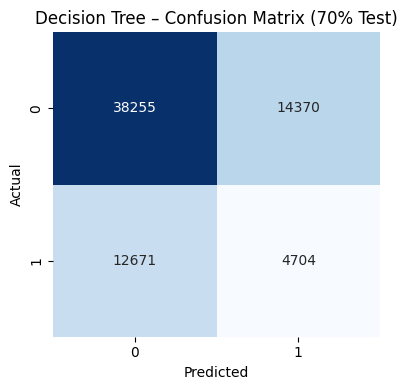


=== Testanteil: 90% ===
Accuracy: 0.6178
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74     67661
           1       0.25      0.26      0.26     22339

    accuracy                           0.62     90000
   macro avg       0.50      0.50      0.50     90000
weighted avg       0.63      0.62      0.62     90000



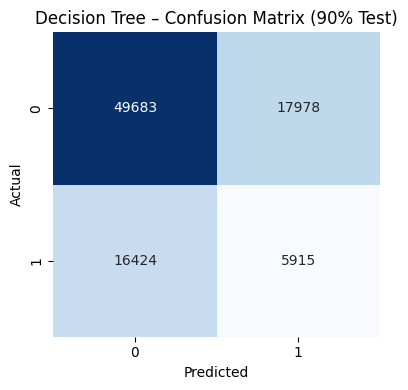

In [54]:
# === Decision Tree: Confusion Matrices für alle Testanteile ===
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

test_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]

for split_p in test_sizes:
    print(f"\n=== Testanteil: {int(split_p * 100)}% ===")
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=split_p, random_state=42, stratify=y
    )

    dt = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)
    y_pred = dt.predict(x_test)

    acc = dt.score(x_test, y_test)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Decision Tree – Confusion Matrix ({int(split_p * 100)}% Test)")
    plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.tight_layout(); plt.show()


Testanteil 10% – Accuracy: 0.6169
Testanteil 30% – Accuracy: 0.6156
Testanteil 50% – Accuracy: 0.6178
Testanteil 70% – Accuracy: 0.6137
Testanteil 90% – Accuracy: 0.6178


,Testanteil,Trainanteil,Accuracy
0,10%,90%,0.617
1,30%,70%,0.616
2,50%,50%,0.618
3,70%,30%,0.614
4,90%,10%,0.618


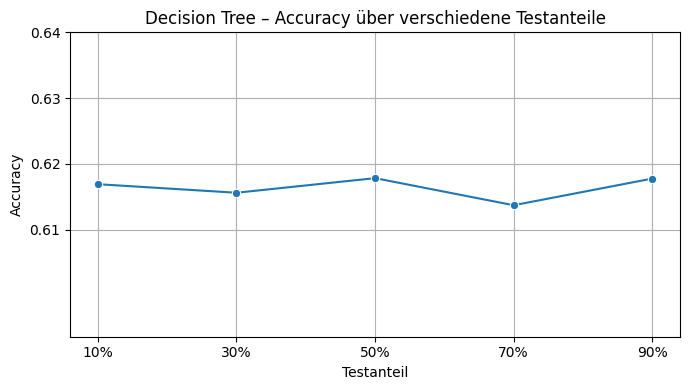

Gespeichert: dt_accuracy_by_split.csv


In [55]:
# === Decision Tree – Übersichtstabelle & Plot (Accuracy je Testanteil) ===
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

test_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
rows = []

for t in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=t, random_state=42, stratify=y
    )
    dt = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)
    acc = dt.score(x_test, y_test)
    rows.append({"Testanteil": t, "Trainanteil": 1 - t, "Accuracy": acc})
    print(f"Testanteil {int(t*100)}% – Accuracy: {acc:.4f}")

dt_acc = pd.DataFrame(rows)
display(dt_acc.style.format({"Testanteil": "{:.0%}", "Trainanteil": "{:.0%}", "Accuracy": "{:.3f}"}))

plt.figure(figsize=(7, 4))
sns.lineplot(data=dt_acc, x="Testanteil", y="Accuracy", marker="o")
plt.xticks(test_sizes, [f"{int(t*100)}%" for t in test_sizes])
plt.ylim(dt_acc["Accuracy"].min() - 0.02, dt_acc["Accuracy"].max() + 0.02)
plt.yticks(np.arange(round(dt_acc["Accuracy"].min(), 2),
                     round(dt_acc["Accuracy"].max() + 0.02, 2), 0.01))
plt.title("Decision Tree – Accuracy über verschiedene Testanteile")
plt.xlabel("Testanteil"); plt.ylabel("Accuracy"); plt.grid(True); plt.tight_layout(); plt.show()

dt_acc.to_csv("dt_accuracy_by_split.csv", index=False)
print("Gespeichert: dt_accuracy_by_split.csv")



<a id = "7"></a><br>

## **Random Forest Classifaction**


In [56]:
# === Random Forest: Einzellauf (30 % Test) ===
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

print("Random Forest Test accuracy:", rf.score(x_test, y_test))


Random Forest Test accuracy: 0.7509666666666667


Testanteil 10% – Accuracy: 0.7517
Testanteil 30% – Accuracy: 0.7510
Testanteil 50% – Accuracy: 0.7513
Testanteil 70% – Accuracy: 0.7512
Testanteil 90% – Accuracy: 0.7506


,Testanteil,Trainanteil,Accuracy
0,10%,90%,0.752
1,30%,70%,0.751
2,50%,50%,0.751
3,70%,30%,0.751
4,90%,10%,0.751


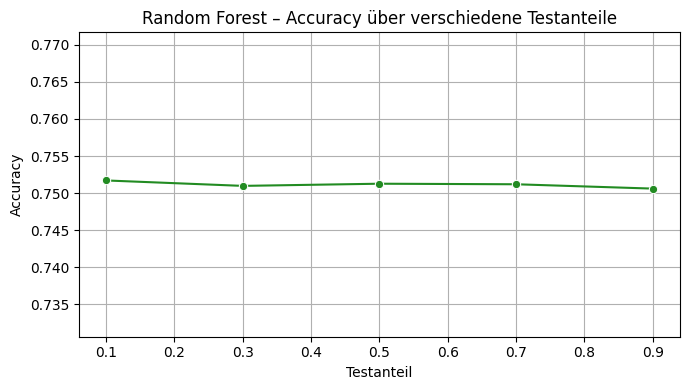

Gespeichert: rf_accuracy_by_split.csv


In [57]:
# === Random Forest: 10/30/50/70/90 % Testanteil (Tabelle + Plot) ===
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

test_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
rf_rows = []

for t in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=t, random_state=42, stratify=y
    )
    rf_tmp = RandomForestClassifier(n_estimators=100, random_state=42).fit(x_train, y_train)
    acc = rf_tmp.score(x_test, y_test)
    rf_rows.append({"Testanteil": t, "Trainanteil": 1 - t, "Accuracy": acc})
    print(f"Testanteil {int(t*100)}% – Accuracy: {acc:.4f}")

# Tabelle + Plot
rf_df = pd.DataFrame(rf_rows)
display(rf_df.style.format({"Testanteil": "{:.0%}", "Trainanteil": "{:.0%}", "Accuracy": "{:.3f}"}))

plt.figure(figsize=(7, 4))
sns.lineplot(data=rf_df, x="Testanteil", y="Accuracy", marker="o", color="forestgreen")
plt.title("Random Forest – Accuracy über verschiedene Testanteile")
plt.xlabel("Testanteil")
plt.ylabel("Accuracy")
plt.ylim(rf_df["Accuracy"].min() - 0.02, rf_df["Accuracy"].max() + 0.02)
plt.grid(True)
plt.tight_layout()
plt.show()

rf_df.to_csv("rf_accuracy_by_split.csv", index=False)
print("Gespeichert: rf_accuracy_by_split.csv")



=== Testanteil: 10% ===
Accuracy: 0.7517
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      7518
           1       0.44      0.00      0.00      2482

    accuracy                           0.75     10000
   macro avg       0.60      0.50      0.43     10000
weighted avg       0.68      0.75      0.65     10000



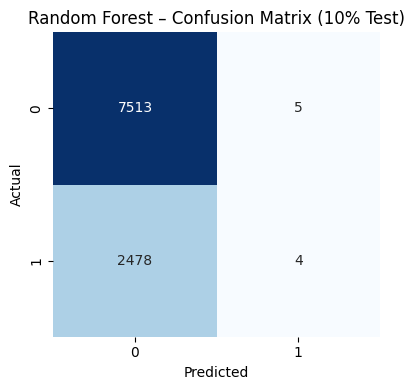


=== Testanteil: 30% ===
Accuracy: 0.7510
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     22554
           1       0.16      0.00      0.00      7446

    accuracy                           0.75     30000
   macro avg       0.46      0.50      0.43     30000
weighted avg       0.61      0.75      0.65     30000



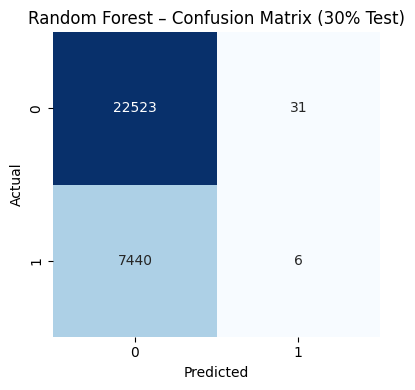


=== Testanteil: 50% ===
Accuracy: 0.7513
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     37590
           1       0.25      0.00      0.00     12410

    accuracy                           0.75     50000
   macro avg       0.50      0.50      0.43     50000
weighted avg       0.63      0.75      0.65     50000



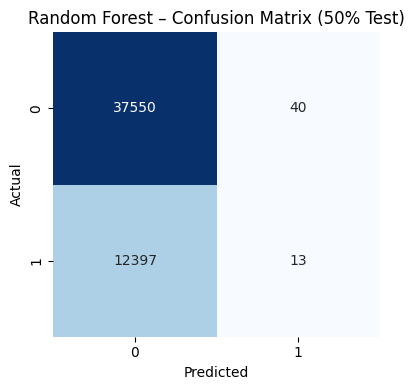


=== Testanteil: 70% ===
Accuracy: 0.7512
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     52625
           1       0.27      0.00      0.00     17375

    accuracy                           0.75     70000
   macro avg       0.51      0.50      0.43     70000
weighted avg       0.63      0.75      0.65     70000



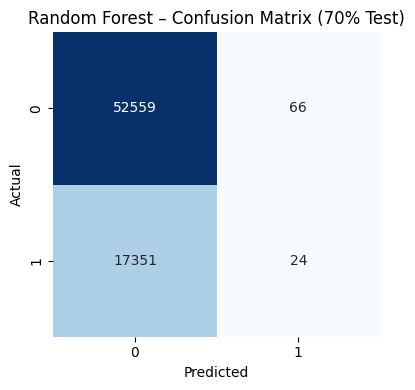


=== Testanteil: 90% ===
Accuracy: 0.7506
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     67661
           1       0.24      0.00      0.00     22339

    accuracy                           0.75     90000
   macro avg       0.50      0.50      0.43     90000
weighted avg       0.62      0.75      0.65     90000



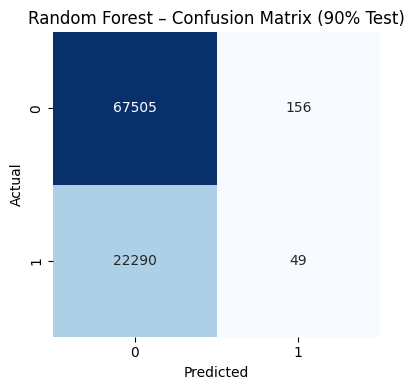

In [58]:
# === Random Forest: Confusion Matrices für alle Testanteile ===
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

test_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]

for split_p in test_sizes:
    print(f"\n=== Testanteil: {int(split_p * 100)}% ===")
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=split_p, random_state=42, stratify=y
    )

    rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(x_train, y_train)
    y_pred = rf.predict(x_test)

    acc = rf.score(x_test, y_test)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Random Forest – Confusion Matrix ({int(split_p * 100)}% Test)")
    plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.tight_layout(); plt.show()


Testanteil 10% – Accuracy: 0.7517
Testanteil 30% – Accuracy: 0.7510
Testanteil 50% – Accuracy: 0.7513
Testanteil 70% – Accuracy: 0.7512
Testanteil 90% – Accuracy: 0.7506


,Testanteil,Trainanteil,Accuracy
0,10%,90%,0.752
1,30%,70%,0.751
2,50%,50%,0.751
3,70%,30%,0.751
4,90%,10%,0.751


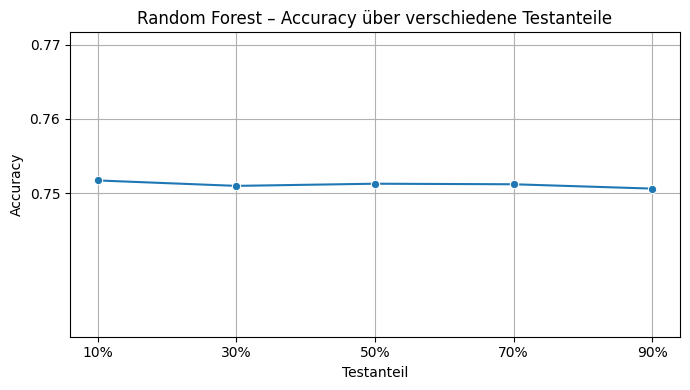

Gespeichert: rf_accuracy_by_split.csv


In [59]:
# === Random Forest – Übersichtstabelle & Plot (Accuracy je Testanteil) ===
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

test_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
rows = []

for t in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=t, random_state=42, stratify=y
    )
    rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(x_train, y_train)
    acc = rf.score(x_test, y_test)
    rows.append({"Testanteil": t, "Trainanteil": 1 - t, "Accuracy": acc})
    print(f"Testanteil {int(t*100)}% – Accuracy: {acc:.4f}")

rf_acc = pd.DataFrame(rows)
display(rf_acc.style.format({"Testanteil": "{:.0%}", "Trainanteil": "{:.0%}", "Accuracy": "{:.3f}"}))

plt.figure(figsize=(7, 4))
sns.lineplot(data=rf_acc, x="Testanteil", y="Accuracy", marker="o")
plt.xticks(test_sizes, [f"{int(t*100)}%" for t in test_sizes])
plt.ylim(rf_acc["Accuracy"].min() - 0.02, rf_acc["Accuracy"].max() + 0.02)
plt.yticks(np.arange(round(rf_acc["Accuracy"].min(), 2),
                     round(rf_acc["Accuracy"].max() + 0.02, 2), 0.01))
plt.title("Random Forest – Accuracy über verschiedene Testanteile")
plt.xlabel("Testanteil"); plt.ylabel("Accuracy"); plt.grid(True); plt.tight_layout(); plt.show()

rf_acc.to_csv("rf_accuracy_by_split.csv", index=False)
print("Gespeichert: rf_accuracy_by_split.csv")


<a id = "8"></a><br>

# **abschliessender Vergleich**

Logistic Regression | Test 10% | Acc: 0.7518
Naive Bayes         | Test 10% | Acc: 0.7518
SVM                 | Test 10% | Acc: 0.7518
Decision Tree       | Test 10% | Acc: 0.6169
Random Forest       | Test 10% | Acc: 0.7517
KNN (best k=21)      | Test 10% | Acc: 0.7488
Logistic Regression | Test 30% | Acc: 0.7518
Naive Bayes         | Test 30% | Acc: 0.7518
SVM                 | Test 30% | Acc: 0.7518
Decision Tree       | Test 30% | Acc: 0.6156
Random Forest       | Test 30% | Acc: 0.7510
KNN (best k=21)      | Test 30% | Acc: 0.7482
Logistic Regression | Test 50% | Acc: 0.7518
Naive Bayes         | Test 50% | Acc: 0.7518
SVM                 | Test 50% | Acc: 0.7518
Decision Tree       | Test 50% | Acc: 0.6178
Random Forest       | Test 50% | Acc: 0.7513
KNN (best k=21)      | Test 50% | Acc: 0.7487
Logistic Regression | Test 70% | Acc: 0.7518
Naive Bayes         | Test 70% | Acc: 0.7518
SVM                 | Test 70% | Acc: 0.7518
Decision Tree       | Test 70% | Acc: 0.6137
Random 

,Modell,Testanteil,Trainanteil,Accuracy
0,Logistic Regression,10%,90%,0.752
1,Naive Bayes,10%,90%,0.752
2,SVM,10%,90%,0.752
3,Decision Tree,10%,90%,0.617
4,Random Forest,10%,90%,0.752
5,KNN (best k=21),10%,90%,0.749
6,Logistic Regression,30%,70%,0.752
7,Naive Bayes,30%,70%,0.752
8,SVM,30%,70%,0.752
9,Decision Tree,30%,70%,0.616



Bestes k je Testanteil (KNN):


,Testanteil,Bestes k,Accuracy
0,10%,21,0.749
1,30%,21,0.748
2,50%,21,0.749
3,70%,21,0.749
4,90%,21,0.749


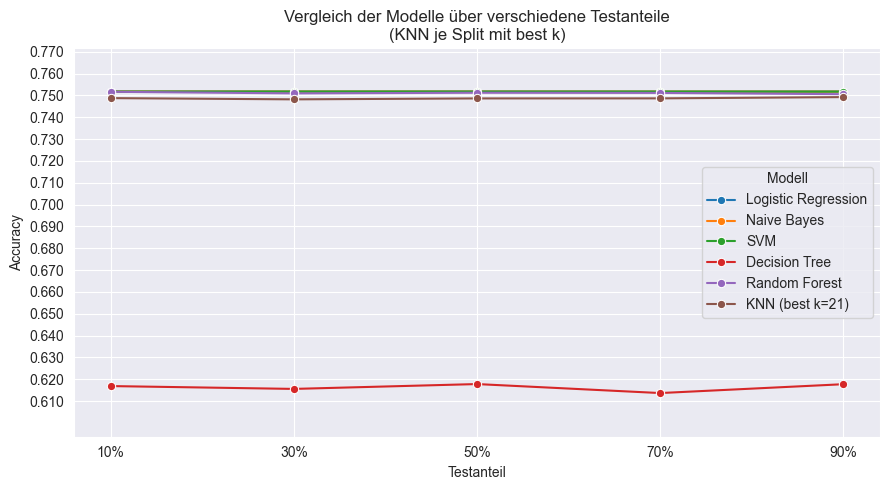

Gespeichert: model_accuracy_over_splits_knn_bestk.csv, knn_bestk_per_split.csv


In [60]:
# === Abschließender Vergleich – alle Modelle über verschiedene Testanteile
#     (KNN nimmt je Split automatisch das beste k; inkl. Logistic Regression) ===
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

test_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
# KNN: Kandidaten für k (ungerade vermeiden Ties)
k_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

# Alle Basismodelle (KNN separat, weil k-Sweep)
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}

results = []
best_k_rows = []  # Übersicht: bestes k je Split

for t in test_sizes:
    # Split je Testanteil
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=t, random_state=42, stratify=y
    )

    # 1) Basismodelle trainieren & messen
    for name, model in base_models.items():
        model.fit(x_train, y_train)
        acc = model.score(x_test, y_test)
        results.append({
            "Modell": name,
            "Testanteil": t,
            "Trainanteil": 1 - t,
            "Accuracy": acc
        })
        print(f"{name:19} | Test {int(t*100)}% | Acc: {acc:.4f}")

    # 2) KNN: bestes k für diesen Split suchen
    best_k, best_acc = None, -1
    for k in k_list:
        knn = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
        acc = knn.score(x_test, y_test)
        if acc > best_acc:
            best_acc, best_k = acc, k

    # KNN (best k) aufnehmen
    results.append({
        "Modell": f"KNN (best k={best_k})",
        "Testanteil": t,
        "Trainanteil": 1 - t,
        "Accuracy": best_acc
    })
    best_k_rows.append({"Testanteil": t, "Bestes k": best_k, "Accuracy": best_acc})
    print(f"KNN (best k={best_k:>2})      | Test {int(t*100)}% | Acc: {best_acc:.4f}")

# === Ergebnisse: Tabellen ===
results_df = pd.DataFrame(results)
best_k_df = pd.DataFrame(best_k_rows)

display(results_df.style.format({
    "Testanteil": "{:.0%}",
    "Trainanteil": "{:.0%}",
    "Accuracy": "{:.3f}"
}))

print("\nBestes k je Testanteil (KNN):")
display(best_k_df.style.format({
    "Testanteil": "{:.0%}",
    "Accuracy": "{:.3f}"
}))

# === Plot – Accuracy pro Modell und Testanteil (KNN mit best k) ===
plt.figure(figsize=(9, 5))
sns.lineplot(data=results_df, x="Testanteil", y="Accuracy", hue="Modell", marker="o")

ax = plt.gca()
ax.ticklabel_format(style="plain", axis="y")
ax.yaxis.set_major_formatter(plt.FormatStrFormatter("%.3f"))

xticks = sorted(results_df["Testanteil"].unique())
plt.xticks(xticks, [f"{int(t*100)}%" for t in xticks])

# dynamische, „gezoomte“ Y-Achse
ymin = results_df["Accuracy"].min()
ymax = results_df["Accuracy"].max()
plt.ylim(ymin - 0.02, ymax + 0.02)
plt.yticks(np.arange(round(ymin, 2), round(ymax + 0.02, 2), 0.01))

plt.title("Vergleich der Modelle über verschiedene Testanteile\n(KNN je Split mit best k)")
plt.xlabel("Testanteil")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Optional: speichern für Bericht ===
results_df.to_csv("model_accuracy_over_splits_knn_bestk.csv", index=False)
best_k_df.to_csv("knn_bestk_per_split.csv", index=False)
print("Gespeichert: model_accuracy_over_splits_knn_bestk.csv, knn_bestk_per_split.csv")
